## Système de recommandation Amazon

Le système de recommandation est basé sur le parcours d'un nouveau client depuis le moment où il arrive sur le site Web d'Amazon pour la première fois jusqu'au moment où il effectue des achats répétés.

Comment :

Lorsqu'un nouveau client sans historique d'achat précédent visite le site Web pour la première fois, on lui recommande les produits les plus populaires vendus sur le site Web d'Amazon. Une fois qu'il a effectué un achat, le système de recommandation se met à jour et recommande d'autres produits en fonction de l'historique des achats et des évaluations fournies par d'autres utilisateurs sur le site Web.

# Amazon product review dataset



Data Source: https://www.kaggle.com/datasets/saurav9786/amazon-product-reviews

# 1) Système de recommandation basé sur la popularité des produits et ciblant les nouveaux clients :



Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

Loading the dataset

In [2]:
amazon_ratings = pd.read_csv('/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.shape

(2023070, 4)

In [3]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


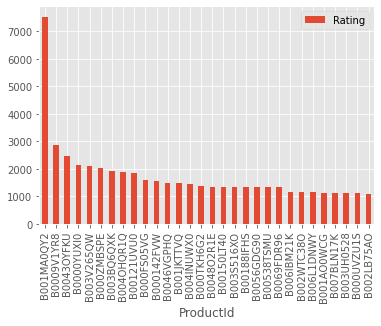

In [4]:
most_popular.head(30).plot(kind = "bar")

Analysis:

The above graph gives us the most popular products (arranged in descending order)

# 2) Système de filtrage collaboratif basé sur un modèle basé sur l'historique d'achat du client et les évaluations fournies par d'autres utilisateurs qui ont acheté des articles similaires

Technique de recommandation :

Ces méthodes sont basées sur des techniques d'apprentissage automatique et d'exploration de données. Le but est de former des modèles pour pouvoir faire des prédictions. Par exemple, nous pourrions utiliser les interactions utilisateur-élément existantes pour former un modèle afin de prédire les 5 principaux éléments qu'un utilisateur pourrait aimer le plus. L'un des avantages de ces méthodes est qu'elles sont capables de recommander un plus grand nombre d'éléments à un plus grand nombre d'utilisateurs, par rapport à d'autres méthodes telles que l'approche basée sur la mémoire. Ils ont une large couverture, même lorsque vous travaillez avec de grandes matrices creuses.

In [5]:
amazon_ratings1 = amazon_ratings.head(10000)
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
ratings_utility_matrix.shape

(9697, 886)

Transposing the matrix

In [7]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X.shape

(886, 9697)

Unique products in subset of data

In [9]:
X1 = X

Decomposing the Matrix

In [10]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

Correlation Matrix

In [11]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

En supposant que le client achète le produit ID # 6117036094 (choisi au hasard)

In [12]:
X.index[99]

'6117036094'

Index # de l'ID de produit acheté par le client

In [13]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Corrélation de tous les articles avec l'article acheté par ce client en fonction des articles notés par d'autres clients ayant acheté le même produit

In [14]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

Recommander les 10 meilleurs produits hautement corrélés en séquence

In [16]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Supprime l'article déjà acheté par le client
Recommend.remove(i) 

Recommend[0:9]

['8901110814',
 '8934903716',
 '9509369934',
 '9748776093',
 '9790790813',
 'B0000020TR',
 'B000005G46',
 'B000052YJC',
 'B000052YJD']

Voici les 10 meilleurs produits à afficher par le système de recommandation au client ci-dessus en fonction de l'historique d'achat des autres clients du site Web d'Amazon